<a href="https://colab.research.google.com/github/pkams/projetos_iniciais/blob/master/transferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Estudos de transferencia de aprendizado
# Baseiam-se em transferir os layers convolucionais treinados previamente
# Retira-se de bases que foram treinadas por muito tempo e tem muito conteudo
# util como: Imagenet
# Presumindo uma estrutura:
# ImageNet -> Layers Convolucionais -> Rede Densa -> Predição
# Retiramos os layers convolucionais e passados para:
# Novas imagens -> Layers Convolucionais -> Nova rede densa -> Nova predição

In [0]:
# As camada convolucionais extraem caracteristicas gerais (bordas, formatos..)
# Uma rede que pegou caracteristicas de um leão, facilmente pegaria caracter.
# principais de gatos e cachorros.

In [0]:
# Conv Layers => Parametros Gerais
# Dense Layers => Parametros Especificos

In [0]:
# Duas estratégias:

# Estratégia 1: 
# Congelar os pesos das primeiras camadas.
# Treinar somente as novas camadas densas (com nova inicialziação de pesos)

# Inicializar a rede neural com pesos pré-treinados
# Retreinar a rede neural inteira mudando taxa de aprendizado para valor pequ.


In [0]:
# Ideal para quando você tem poucos exemplos para fazer treinamento.
# Imagenet por exemplo tem mais de mil classes e 1.5 milhões de imagens.

In [0]:
# Rede pré-treinada utilizada neste exemplo: ResNet50

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [0]:
###

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/transferlearningexercise.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [0]:
sample_image = tf.keras.preprocessing.image.load_img(r'/content/Transfer Learning Data/bicycle.png', target_size=(224,224))

# target_size depende de como modelo foi treinado, neste caso (224,224)

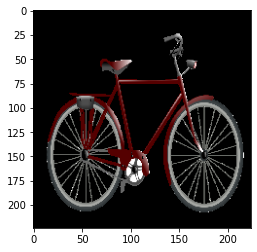

In [14]:
plt.imshow(sample_image)

In [15]:
type(sample_image)

PIL.Image.Image

In [0]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)

In [17]:
# Agora esta no formato array que precisamos para inserir no modelo

type(sample_image)

numpy.ndarray

In [18]:
sample_image.shape

(224, 224, 3)

In [0]:
sample_image = np.expand_dims(sample_image, axis = 0)

In [20]:
# Formato Batch:

sample_image.shape

(1, 224, 224, 3)

In [21]:
sample_image.max()

255.0

In [22]:
sample_image.min()

0.0

In [0]:
# Aplicando mesma estrutura de ''normalização'' da rede neural resnet

sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

In [24]:
sample_image.max(), sample_image.min()

(151.061, -123.68)

In [0]:
predictions = model.predict(sample_image)

In [26]:
# Observando as 3 classes com mais probabilidade

print('Predictions :', tf.keras.applications.resnet50.decode_predictions(predictions, top=3))

40960/35363 [==================================] - 0s 0us/step
Predictions : [[('n02835271', 'bicycle-built-for-two', 0.6329611), ('n03792782', 'mountain_bike', 0.05375586), ('n04482393', 'tricycle', 0.049758)]]


In [0]:
# Transferindo o conhecimento do modelo para um modelo próprio

In [28]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)

# include_top = False => Não carrega os layers densos

94773248/94765736 [==============================] - 1s 0us/step


In [29]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
# Linkamos com a ultima camada do base_model

x = base_model.output

In [0]:
# Linkamos com modelo base

x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [0]:
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='softmax')(x)

# Como vamos predizer gatos e cachorros poderiamos usar a Sigmoid também

In [0]:
model = tf.keras.models.Model(inputs=base_model.input, outputs = preds)

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [35]:
# Se chamarmos o fit ele fará treinamento DO ZERO na rede neural.
# Vamos congelar os layers convolucionais e treinar apenas o que criamos

for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [0]:
# Queremos da camada 175 para frente
# Congelamos o resto

for layer in model.layers[:175]:
  layer.trainable = False

In [0]:
for layer in model.layers[175:]:
  layer.trainable = True

In [0]:
# Vamos criar um gerador de imagens para pegar as imagens e labels ja separados
# em pastas.

train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [39]:
train_generator = train_data_gen.flow_from_directory('/content/Transfer Learning Data/train',
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    batch_size=32,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 202 images belonging to 2 classes.


In [0]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit_generator(generator=train_generator,
                              epochs = 10,
                              steps_per_epoch=100)

Epoch 1/10
100/100 [==============================] - 13s 126ms/step - loss: 8.7226e-10 - accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - 13s 127ms/step - loss: 5.7709e-10 - accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 13s 126ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 13s 126ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 13s 126ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 13s 126ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 13s 125ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
100/100 [==============================] - 12s 125ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
100/100 [==============================] - 13s 126ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
100/100 [================

In [0]:
# Avaliação do modelo

<Figure size 432x288 with 0 Axes>

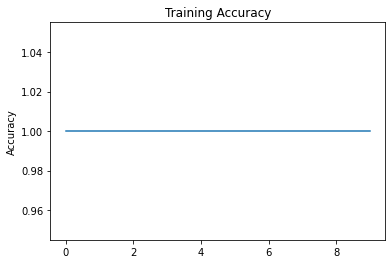

<Figure size 432x288 with 0 Axes>

In [49]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

<Figure size 432x288 with 0 Axes>

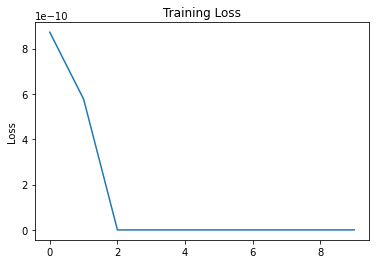

<Figure size 432x288 with 0 Axes>

In [50]:
plt.figure()
plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.figure()

In [0]:
# Vamos carregar algumas imagens e testar

sample_image = tf.keras.preprocessing.image.load_img(r'/content/Transfer Learning Data/cat.282.jpg', target_size=(224,224))

Formato após transformação em array:  (224, 224, 3)
Formato após expandir dimensões:  (1, 224, 224, 3)
[[1.000000e+00 1.895011e-12]]


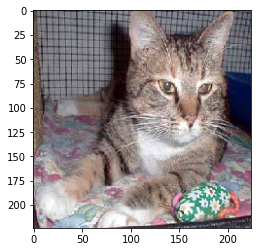

In [74]:

plt.imshow(sample_image)

sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
print('Formato após transformação em array: ',sample_image.shape)

sample_image = np.expand_dims(sample_image, axis = 0)
print('Formato após expandir dimensões: ',sample_image.shape)

sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

predictions = model.predict(sample_image)

print(predictions)

In [0]:
# Vamos carregar algumas imagens e testar

sample_image2 = tf.keras.preprocessing.image.load_img(r'/content/Transfer Learning Data/dog.309.jpg', target_size=(224,224))

Formato após transformação em array:  (224, 224, 3)
Formato após expandir dimensões:  (1, 224, 224, 3)
[[3.615646e-15 1.000000e+00]]


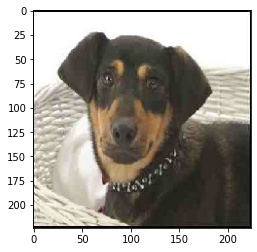

In [77]:

plt.imshow(sample_image2)

sample_image2 = tf.keras.preprocessing.image.img_to_array(sample_image2)
print('Formato após transformação em array: ',sample_image2.shape)

sample_image2 = np.expand_dims(sample_image2, axis = 0)
print('Formato após expandir dimensões: ',sample_image2.shape)

sample_image2 = tf.keras.applications.resnet50.preprocess_input(sample_image2)

predictions2 = model.predict(sample_image2)

print(predictions2)